In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Ejemplo 1

Suma de los elementos POVM:
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


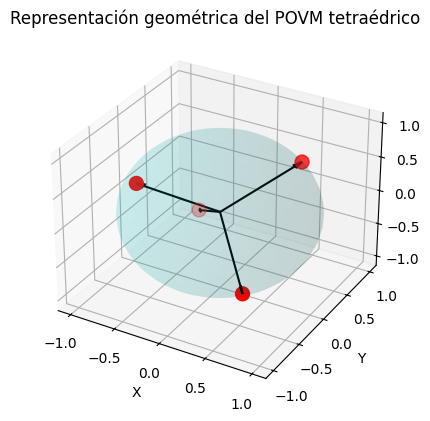

In [ ]:
# 1. Definición de la matriz identidad y las matrices de Pauli
I = np.eye(2)
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# Función que construye el "vector de Pauli" dado un vector 3D r
def pauli_vector(r):
    return r[0]*sigma_x + r[1]*sigma_y + r[2]*sigma_z

# 2. Definición de las direcciones para el POVM tetraédrico
# Estas direcciones corresponden a los vértices de un tetraedro inscrito en la esfera de Bloch.
r1 = np.array([ 1,  1,  1]) / np.sqrt(3)
r2 = np.array([ 1, -1, -1]) / np.sqrt(3)
r3 = np.array([-1,  1, -1]) / np.sqrt(3)
r4 = np.array([-1, -1,  1]) / np.sqrt(3)

# Construcción de los elementos POVM:
# E_i = 1/4 * (I + r_i · σ)
E1 = 1/4 * (I + pauli_vector(r1))
E2 = 1/4 * (I + pauli_vector(r2))
E3 = 1/4 * (I + pauli_vector(r3))
E4 = 1/4 * (I + pauli_vector(r4))

# 3. Verificación de la condición de completitud: ∑ E_i = I
POVM_sum = E1 + E2 + E3 + E4
print("Suma de los elementos POVM:")
print(POVM_sum)  # Debería ser aproximadamente la matriz identidad

# 4. Representación geométrica en la esfera de Bloch
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Creación de la esfera de Bloch para referencia
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, color='c', alpha=0.1, edgecolor='none')

# Posiciones de los vértices del tetraedro (direcciones del POVM)
direcciones = np.array([r1, r2, r3, r4])
ax.scatter(direcciones[:,0], direcciones[:,1], direcciones[:,2], color='r', s=100)

# Dibujar flechas (vectores) desde el origen hasta cada dirección
for r in direcciones:
    ax.quiver(0, 0, 0, r[0], r[1], r[2], color='k', arrow_length_ratio=0.1)

# Configuración de los ejes y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Representación geométrica del POVM tetraédrico")
plt.show()

## Ejemplo 2

Suma de los elementos del POVM trino:
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


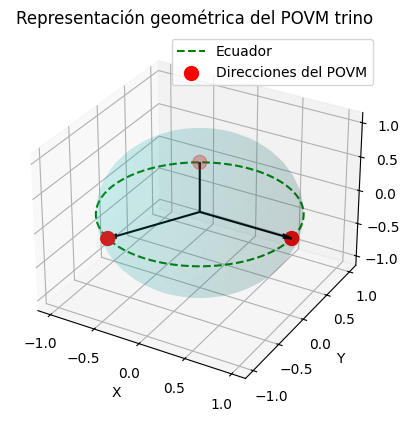

In [ ]:
# 1. Definición de la matriz identidad y las matrices de Pauli
I = np.eye(2)
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# 2. Función para construir el operador r · σ dado un vector 3D r
def pauli_vector(r):
    return r[0]*sigma_x + r[1]*sigma_y + r[2]*sigma_z

# 3. Definición de las direcciones del POVM trino (en el plano equatorial)
# Los ángulos son 0, 120° y 240°:
r1 = np.array([1, 0, 0])
r2 = np.array([ -0.5,  np.sqrt(3)/2, 0])
r3 = np.array([ -0.5, -np.sqrt(3)/2, 0])

# 4. Construcción de los elementos del POVM
# Para el trine POVM, se define cada elemento como:
# E_k = 1/3 (I + r_k · σ)
E1 = 1/3 * (I + pauli_vector(r1))
E2 = 1/3 * (I + pauli_vector(r2))
E3 = 1/3 * (I + pauli_vector(r3))

# 5. Verificación de la condición de completitud: ∑ E_k = I
POVM_sum = E1 + E2 + E3
print("Suma de los elementos del POVM trino:")
print(POVM_sum)  # Debería aproximarse a la matriz identidad

# 6. Representación gráfica en la esfera de Bloch
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Creación de la esfera de Bloch (parámetros en coordenadas esféricas)
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, color='c', alpha=0.1, edgecolor='none')

# Graficar la circunferencia equatorial (donde z=0) para referencia
theta = np.linspace(0, 2*np.pi, 100)
ax.plot(np.cos(theta), np.sin(theta), np.zeros_like(theta), 'g--', label='Ecuador')

# Ploteo de las direcciones (vectores) definidas para el POVM trino
direcciones = np.array([r1, r2, r3])
ax.scatter(direcciones[:,0], direcciones[:,1], direcciones[:,2], color='r', s=100, label='Direcciones del POVM')

# Dibujar flechas desde el origen hacia cada dirección
for r in direcciones:
    ax.quiver(0, 0, 0, r[0], r[1], r[2], color='k', arrow_length_ratio=0.1)

# Configuración de los ejes y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Representación geométrica del POVM trino")
ax.legend()
plt.show()